## Set Up + Imports

In [1]:
import setup

setup.main()
%load_ext autoreload
%autoreload 2
%load_ext jupyter_black

import numpy as np
import matplotlib.pyplot as plt

Working directory:  /home/facosta/neurometry/neurometry
Directory added to path:  /home/facosta/neurometry
Directory added to path:  /home/facosta/neurometry/neurometry


### Load Single-Agent activations

In [2]:
import os
import sys

path = os.getcwd() + "/datasets/rnn_grid_cells"
sys.path.append(path)
from neurometry.datasets.load_rnn_grid_cells import load_activations

In [3]:
parent_dir = "/scratch/facosta/rnn_grid_cells"
single_model_folder = "Single agent path integration high res/Seed 0"
single_model_parameters = "steps_20_batch_200_RNN_4096_relu_rf_012_DoG_True_periodic_False_lr_00001_weight_decay_1e-06"
single_file_path = os.path.join(
    parent_dir, single_model_folder, single_model_parameters
)


epochs = ["final"]

(
    single_agent_activations,
    single_agent_rate_maps,
    single_agent_state_points,
    single_agent_positions,
    single_agent_gs,
) = load_activations(epochs, single_file_path, version="single", verbose=True)

Epoch final found.
Loaded epochs ['final'] of single agent model.
activations has shape (4096, 20, 20, 5). There are 4096 grid cells with 20 x 20 environment resolution, averaged over 5 trajectories.
state_points has shape (4096, 2000). There are 2000 data points in the 4096-dimensional state space.
rate_maps has shape (4096, 400). There are 400 data points averaged over 5 trajectories in the 4096-dimensional state space.
positions has shape (100000, 2).


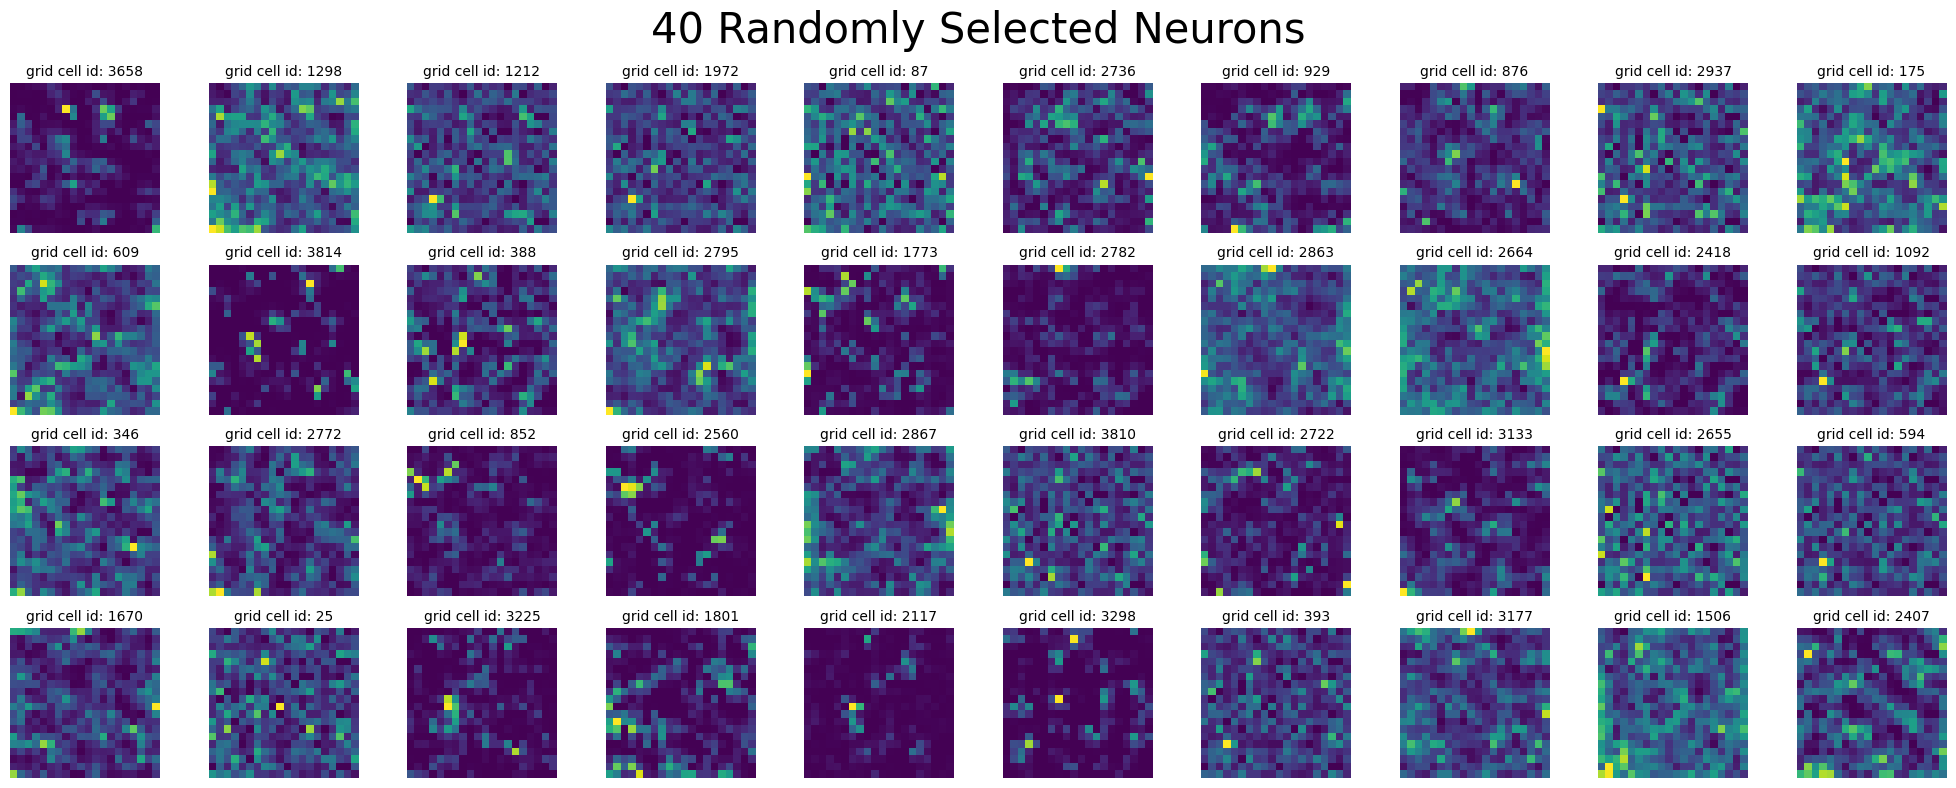

In [4]:
from neurometry.datasets.load_rnn_grid_cells import plot_rate_map


num_plots = 40
plot_rate_map(
    None,
    num_plots,
    single_agent_activations[-1],
    title=f"{num_plots} Randomly Selected Neurons",
)

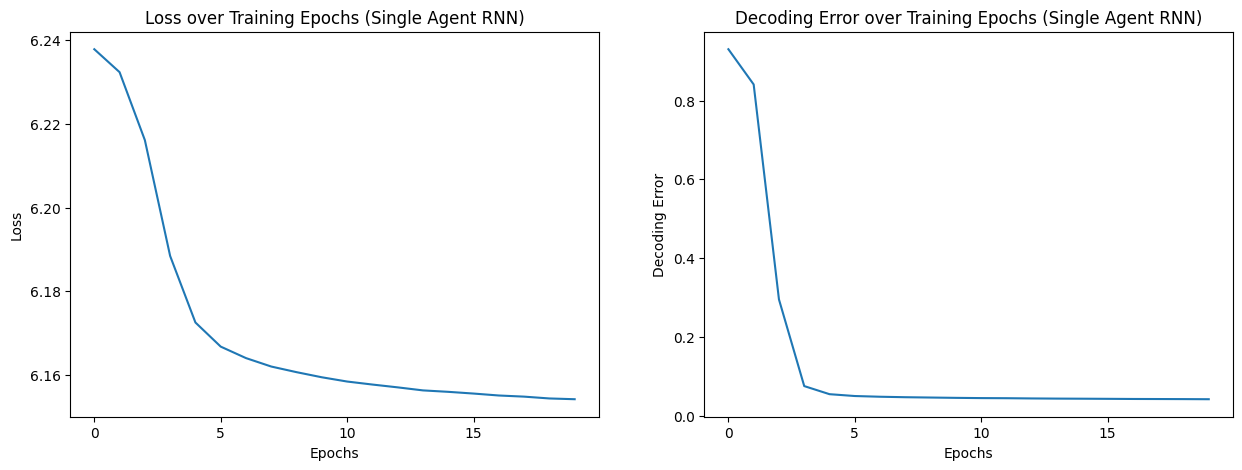

In [5]:
loss_path = os.path.join(
    parent_dir, single_model_folder, single_model_parameters, "loss.npy"
)
loss = np.load(loss_path)
loss_aggregated = np.mean(loss.reshape(-1, 1000), axis=1)

decoding_error_path = os.path.join(
    parent_dir, single_model_folder, single_model_parameters, "decoding_error.npy"
)

decoding_error = np.load(decoding_error_path)
decoding_error_aggregated = np.mean(decoding_error.reshape(-1, 1000), axis=1)

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

epochs = list(range(0, 20))
axs[0].plot(epochs, loss_aggregated)
axs[0].set_xlabel("Epochs")
axs[0].set_ylabel("Loss")
axs[0].set_title("Loss over Training Epochs (Single Agent RNN)")

axs[0].set_xticks(epochs[::5])

axs[1].plot(epochs, decoding_error_aggregated)
axs[1].set_xlabel("Epochs")
axs[1].set_ylabel("Decoding Error")
axs[1].set_title("Decoding Error over Training Epochs (Single Agent RNN)")

axs[1].set_xticks(epochs[::5]);

In [6]:
representations = []

for rep in single_agent_rate_maps:
    points = rep.T
    norm_points = points / np.linalg.norm(points, axis=1)[:, None]
    representations.append(norm_points)

In [7]:
representations[0].shape

(400, 4096)

### Compute Persistent Homology using $\texttt{giotto-tda}$

## Load Dual-Agent activations

In [8]:
parent_dir = "/scratch/facosta/rnn_grid_cells"
dual_model_folder = "Dual agent path integration high res/Seed 0"
dual_model_parameters = "steps_20_batch_200_RNN_4096_relu_rf_012_DoG_True_periodic_False_lr_00001_weight_decay_1e-06"
dual_file_path = os.path.join(parent_dir, dual_model_folder, dual_model_parameters)


epochs = ["final"]

(
    dual_agent_activations,
    dual_model_folder_agent_rate_maps,
    dual_agent_state_points,
    dual_agent_positions,
    dual_agent_gs,
) = load_activations(epochs, dual_file_path, version="dual", verbose=True)

Epoch final found.
Loaded epochs ['final'] of dual agent model.
activations has shape (4096, 20, 20, 5). There are 4096 grid cells with 20 x 20 environment resolution, averaged over 5 trajectories.
state_points has shape (4096, 2000). There are 2000 data points in the 4096-dimensional state space.
rate_maps has shape (4096, 400). There are 400 data points averaged over 5 trajectories in the 4096-dimensional state space.
positions has shape (100000, 2).


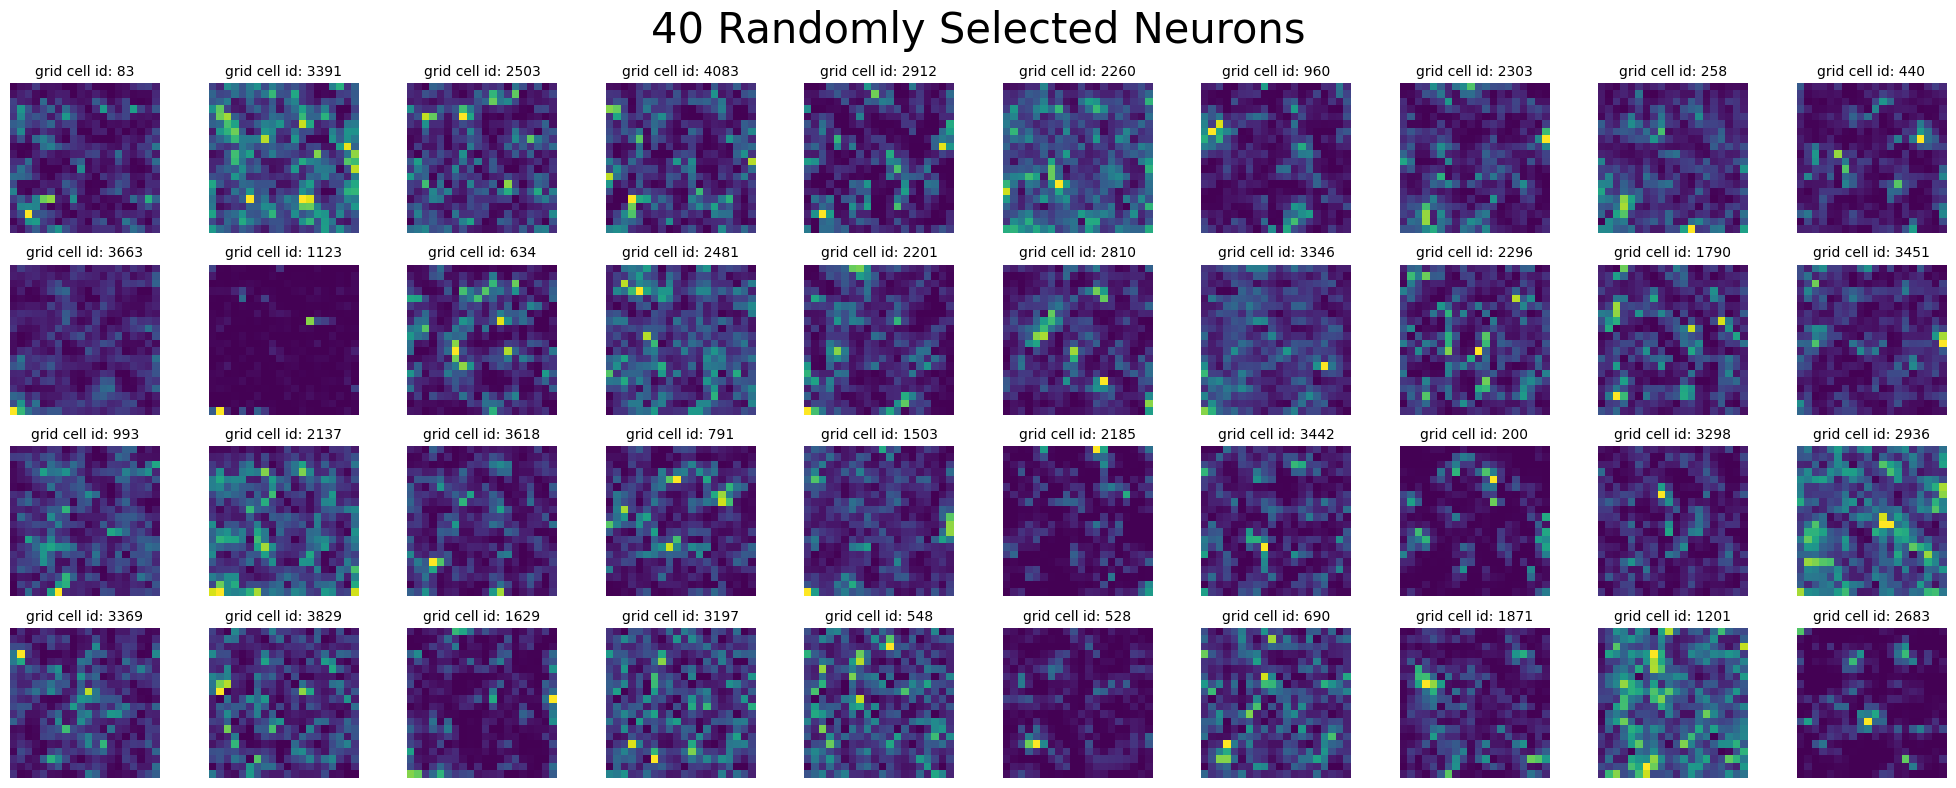

In [9]:
num_plots = 40
plot_rate_map(
    None,
    num_plots,
    dual_agent_activations[-1],
    title=f"{num_plots} Randomly Selected Neurons",
)

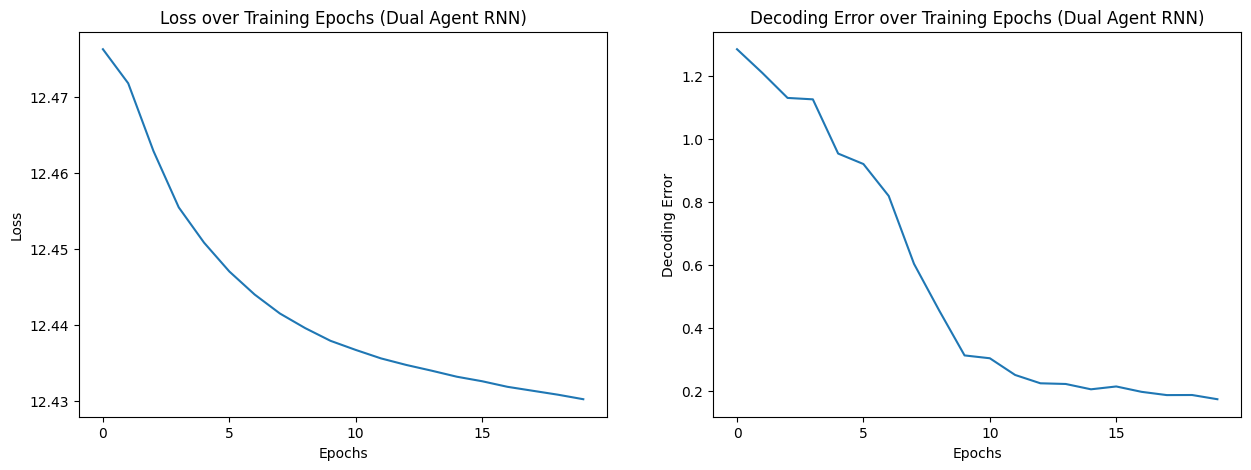

In [10]:
loss_path = os.path.join(
    parent_dir, dual_model_folder, dual_model_parameters, "loss.npy"
)
loss = np.load(loss_path)
loss_aggregated = np.mean(loss.reshape(-1, 1000), axis=1)

decoding_error_path = os.path.join(
    parent_dir, dual_model_folder, dual_model_parameters, "decoding_error.npy"
)

decoding_error = np.load(decoding_error_path)
decoding_error_aggregated = np.mean(decoding_error.reshape(-1, 2), axis=1)

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

epochs = list(range(0, 20))
axs[0].plot(epochs, loss_aggregated)
axs[0].set_xlabel("Epochs")
axs[0].set_ylabel("Loss")
axs[0].set_title("Loss over Training Epochs (Dual Agent RNN)")

axs[0].set_xticks(epochs[::5])

axs[1].plot(epochs, decoding_error_aggregated)
axs[1].set_xlabel("Epochs")
axs[1].set_ylabel("Decoding Error")
axs[1].set_title("Decoding Error over Training Epochs (Dual Agent RNN)")

axs[1].set_xticks(epochs[::5]);